# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

#crypto_assets = ['Btc','ETH']
#crypto_size = [1.2,5.3]
#crypto_df = pd.DataFrame({'Amount':crypto_size}, index=crypto_assets)
#crypto_df

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()


In [6]:
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price

44056.0

In [7]:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

3149.9

In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52867.20
The current value of your 5.3 ETH is $16694.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000
).df


# Preview DataFrame
df_portfolio.tail()

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2021-09-20 00:00:00-04:00  116.02  116.1700  115.975  116.120  4463038   
2021-09-21 00:00:00-04:00  116.13  116.1700  116.045  116.135  4455403   
2021-09-22 00:00:00-04:00  116.11  116.2500  116.005  116.190  6079965   
2021-09-23 00:00:00-04:00  115.93  115.9400  115.570  115.570  7516613   
2021-09-24 00:00:00-04:00  115.50  115.5055  115.319  115.410  3388185   

                              SPY                                      
                             open    high      low   close     volume  
time                                                                   
2021-09-20 00:00:00-04:00  434.88  436.56  428.860  434.07  149948277  
2021-09-21 00:00:00-04:00  436.53  437.91  433.070  433.67   82418070  
2021-09-22 00:00:00-04:00  436.05  440.03  433.747  437.83   91135278  
2021-09-23 00:00:00-04:00  439.84  444.89  439.600  443.13   67408294  
2021-09-24 00:00:00-04:00  441.44  444.67  441.210  443.92   52199034

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][-1]
spy_close_price = df_portfolio['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.41
Current SPY closing price: $443.92


In [14]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22196.00
The current value of your 200 AGG shares is $23082.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Set asset classes
assets = ['crypto','shares']

# Combine crypto into a single value, and shares into a single value
amount = [(my_eth_value + my_btc_value),(my_spy_value+my_agg_value)]

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':amount},index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,69561.67
shares,45278.00


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

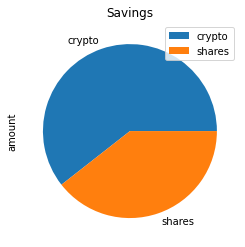

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title = 'Savings')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.loc['crypto']['amount'] + df_savings.loc['shares']['amount']


# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats!! You have enough savings for an emergency fund...")
if total_savings == emergency_fund:
        print(f"Congrats! You have reached your emergency fund goal.")
if total_savings < emergency_fund:
            print(f"You are ${emergency_fund-total_savings} dollars away from your emergency fund goal.")
          

Congrats!! You have enough savings for an emergency fund...


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_retirement_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000
).df

# Display sample data
df_retirement_portfolio.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   
2017-10-10 00:00:00-04:00  109.47  109.61  109.3999  109.43  1502645.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-04 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-05 00:00:00-04:00  253.51  254.68  253.40  254.64  45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.85  254.40  40706912.0  
2017-10-09 00:00:00-04:00  254.63  254.70  253.65  253.96  23554888.0  
2017-10-10 00:00:00-04:00  254.62  255.05  253.98  254.60  28248210.0

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_retirement_portfolio,
    weights = [.60,.40],
    num_simulation = 500, #at least 500
    num_trading_days = 252*30 # How many days you want to simulate it over 
)

In [21]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   
2017-10-10 00:00:00-04:00  109.47  109.61  109.3999  109.43  1502645.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-04 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   
2017-10-10 00:00:00-04:00     0.000274  254.62  255.05  253.98  254.60   

                                                    
                               volume daily_return  
time                                                
2017-10-04 00:00:00-04:00         NaN          NaN  
2017-10-05 00:00:00-04:00  45350955.0          NaN  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730  
2017-10-10 00:00:00-04:00  28248210.0     0.002520

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
sim_cum_returns_df = MC_30year.calc_cumulative_return()
sim_cum_returns_df

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003699,0.997515,0.998304,1.001090,1.009131,1.001810,1.002848,1.006233,0.996669,0.994985,...,0.992972,1.000127,0.995341,0.995129,1.009033,0.996471,1.006204,0.992876,1.013119,0.991533
2,1.001789,0.992170,1.003239,1.003684,1.024578,0.997753,1.009518,1.007777,0.997133,0.988895,...,0.995088,1.000791,0.992853,0.991708,1.006055,0.999984,1.007112,0.989710,1.015012,0.986718
3,0.998371,0.990750,0.996694,1.002529,1.012314,0.999813,1.009738,1.003358,1.000142,0.983128,...,0.998965,1.005892,0.996646,0.997677,1.007862,0.998019,1.008555,0.986006,1.018610,0.985116
4,0.989912,0.996998,0.997471,0.999102,1.008503,1.001418,1.010015,1.003506,1.003107,0.980994,...,0.996014,1.003432,1.004150,0.996106,1.008257,0.996750,1.012330,0.991359,1.013511,0.982510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.315771,2.836976,7.682897,4.238044,6.619179,6.535727,14.396938,4.083646,9.664807,12.133378,...,4.849986,16.888453,8.839069,6.889122,13.056763,4.118158,5.855029,6.587322,7.621379,4.871854
7557,4.276241,2.848218,7.678708,4.263047,6.653982,6.505515,14.376456,4.082272,9.673515,12.072798,...,4.853199,16.842054,8.806648,6.907710,13.086682,4.098245,5.851341,6.601896,7.596276,4.869474
7558,4.261317,2.834568,7.639505,4.248232,6.696961,6.469113,14.295950,4.086834,9.702759,12.028882,...,4.884626,16.732194,8.871806,6.913517,13.115541,4.072877,5.881659,6.546276,7.586357,4.865244
7559,4.249082,2.841458,7.593200,4.256223,6.642129,6.524277,14.273656,4.067891,9.686687,11.959069,...,4.887580,16.730456,8.868638,6.941883,13.223965,4.103071,5.852727,6.568803,7.565989,4.912675


<AxesSubplot:>

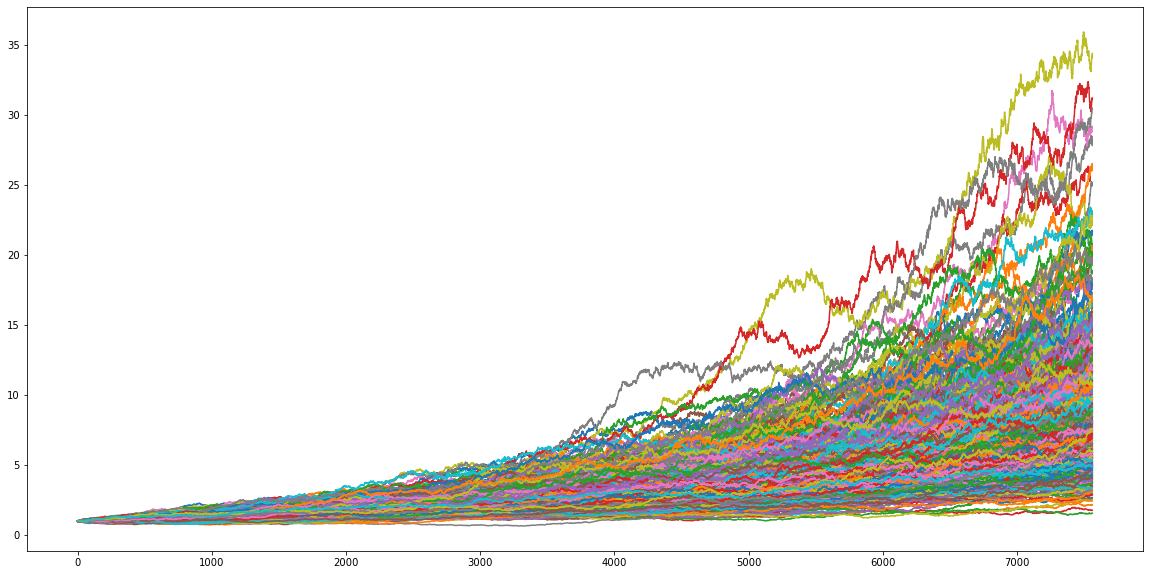

In [23]:
# Plot simulation outcomes
sim_cum_returns_df.plot(figsize=(20,10), legend=False)

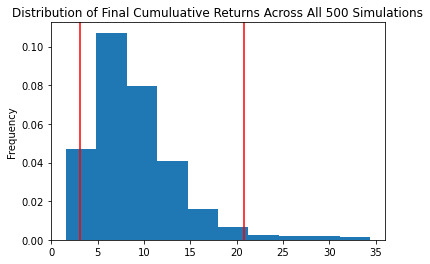

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
summary_tbl

count           500.000000
mean              9.041278
std               4.753498
min               1.560943
25%               5.574649
50%               8.073197
75%              11.003499
max              34.400094
95% CI Lower      3.040415
95% CI Upper     20.749575
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60808.29 and $414991.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8]*initial_investment,2)
ci_upper = round(summary_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91212.44 and $622487.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Increase stock/bond ratio to 50/50 to add slightly more risk
MC_5year = MCSimulation(
    portfolio_data = df_retirement_portfolio,
    weights = [.50,.50],
    num_simulation = 500, #at least 500
    num_trading_days = 252*5 # How many days you want to simulate it over 
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
sim_cum_5year_df = MC_5year.calc_cumulative_return()
sim_cum_5year_df

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000160,0.986841,1.005879,1.006975,0.998697,1.000846,1.004634,1.001092,1.001468,0.991970,...,1.001498,1.013349,1.016622,1.002728,0.997713,1.009224,1.001286,0.992809,1.000614,0.998758
2,1.007579,0.977955,1.002179,1.006048,1.002235,1.000870,1.005327,1.007461,1.000206,0.994317,...,1.005393,1.009664,1.016190,1.007046,1.000083,1.006496,1.004687,0.994884,0.996712,1.002173
3,1.019676,0.978923,0.999015,1.005899,0.990957,0.981360,1.009135,1.008295,1.002898,0.997174,...,0.994489,1.006264,1.009465,1.009488,0.995781,1.008173,0.995213,0.989333,0.995397,0.999253
4,1.014553,0.988954,0.991192,1.007663,0.983485,0.981020,1.010869,1.004884,0.990043,1.000949,...,0.985628,1.006268,1.011050,1.007997,0.990637,1.003978,0.996299,0.981196,0.996896,1.009322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.899262,1.692179,1.849135,1.867226,2.070002,1.562892,2.078545,1.099238,1.647868,0.937211,...,1.374836,0.980579,1.720424,2.590325,1.946531,1.464289,1.329690,2.100045,1.857225,1.752355
1257,1.895568,1.668429,1.864275,1.887365,2.083576,1.575850,2.103401,1.092395,1.657383,0.939592,...,1.352621,0.978070,1.719330,2.585029,1.941571,1.450967,1.312842,2.105313,1.839846,1.746806
1258,1.888271,1.696267,1.857761,1.876163,2.074768,1.585997,2.103903,1.096215,1.658815,0.938199,...,1.339324,0.982168,1.720668,2.572464,1.909656,1.453276,1.315411,2.096090,1.832775,1.727904
1259,1.905900,1.704755,1.844802,1.872031,2.079995,1.603948,2.111080,1.090312,1.662534,0.935794,...,1.340686,0.974570,1.717585,2.590031,1.888562,1.467552,1.315830,2.107369,1.845822,1.745805


<AxesSubplot:>

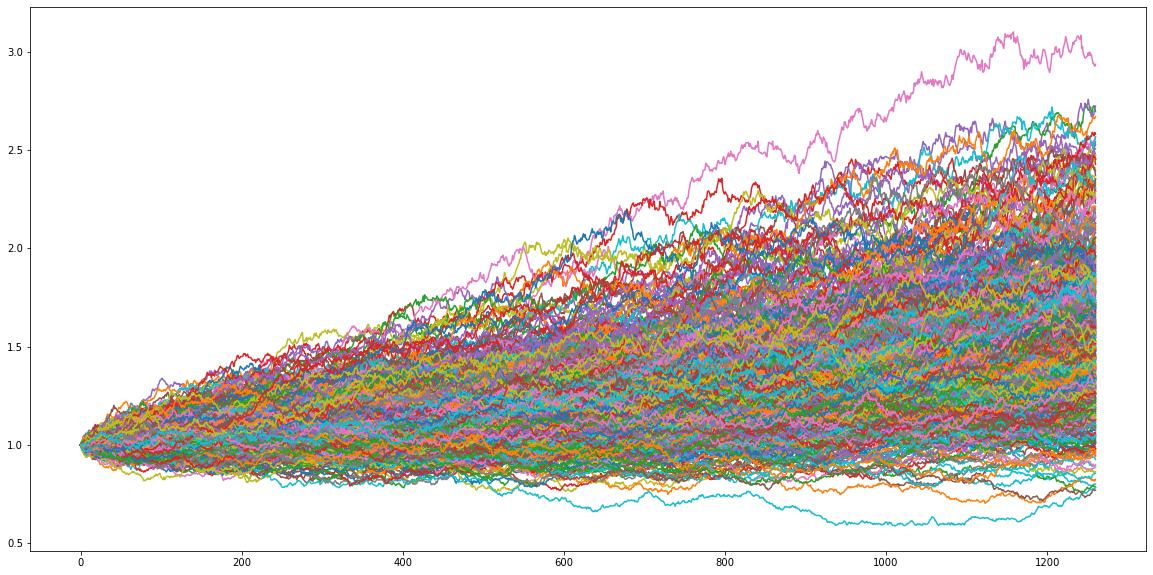

In [30]:
# Plot simulation outcomes
sim_cum_5year_df.plot(figsize=(20,10), legend=False)

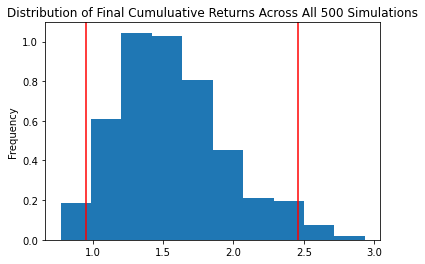

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_5year = MC_5year.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
summary_tbl_5year

count           500.000000
mean              1.563652
std               0.388230
min               0.770553
25%               1.288880
50%               1.517773
75%               1.794686
max               2.934442
95% CI Lower      0.950875
95% CI Upper      2.456717
Name: 1260, dtype: float64

In [33]:
# Set initial investment
# Increase intial investment to reture in 5 years
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_5year[8]*initial_investment,2)
ci_upper_five = round(summary_tbl_5year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57052.5 and $147403.01


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Increase stock/bond ratio to 50/50 to slightly increase risk
MC_10year = MCSimulation(
    portfolio_data = df_retirement_portfolio,
    weights = [.50,.50],
    num_simulation = 500, #at least 500
    num_trading_days = 252*10 # How many days you want to simulate it over 
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
sim_cum_10year_df = MC_10year.calc_cumulative_return()
sim_cum_10year_df

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008425,1.006455,0.997045,1.013355,0.988940,1.005545,1.013937,1.005062,0.991323,1.006840,...,0.996586,1.004959,0.998245,1.007584,1.008662,0.992927,1.010698,1.009932,1.004836,1.007625
2,1.007248,1.018298,0.996186,1.019989,0.995416,1.013361,1.019578,1.003511,1.003062,1.001808,...,0.990643,1.003994,0.986712,1.007843,0.996327,0.991053,1.016026,1.002645,1.002561,1.010970
3,1.001195,1.015126,0.978735,1.016126,1.002268,1.019548,1.026105,1.016401,0.998280,1.017822,...,0.983857,0.996578,0.988269,1.007056,0.988134,0.999331,1.022844,1.001744,0.992549,1.016240
4,1.003649,1.013058,0.986975,1.017966,0.997190,1.015595,1.018114,1.013993,0.991567,1.005370,...,0.984599,0.997600,0.991330,1.008737,0.996076,0.999303,1.027533,1.003319,0.987839,1.020100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.101845,1.176490,3.136063,2.344728,2.023677,2.676499,1.120972,2.746990,2.520231,2.615344,...,3.174468,3.028107,3.925328,1.961140,3.629606,2.524380,1.834004,1.288567,1.807625,3.791014
2517,2.089481,1.164470,3.133899,2.331878,2.029584,2.704756,1.114353,2.711437,2.501869,2.606573,...,3.175005,2.999121,3.931642,1.936894,3.640970,2.487602,1.841859,1.291265,1.809085,3.825877
2518,2.100125,1.169542,3.122632,2.360952,2.028934,2.719871,1.103789,2.711177,2.494946,2.611042,...,3.161054,3.000964,3.898069,1.968468,3.645679,2.469019,1.843078,1.298087,1.806825,3.844734
2519,2.114138,1.187491,3.118208,2.353389,2.008747,2.716926,1.088190,2.706288,2.476384,2.603142,...,3.166631,3.030547,3.880054,1.970393,3.632078,2.483627,1.837911,1.306646,1.780464,3.820423


<AxesSubplot:>

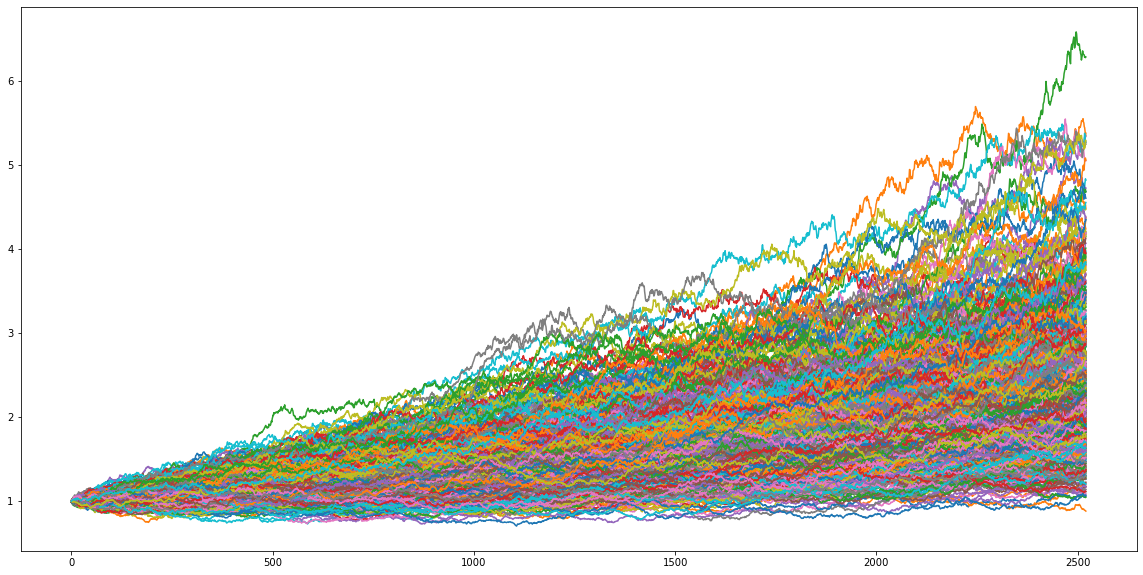

In [36]:
# Plot simulation outcomes
sim_cum_10year_df.plot(figsize=(20,10), legend=False)

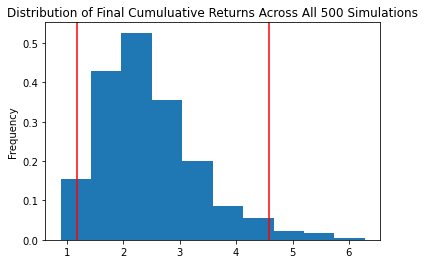

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_10year = MC_10year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_10year = MC_10year.summarize_cumulative_return()
# Print summary statistics
summary_tbl_10year

count           500.000000
mean              2.443175
std               0.868045
min               0.883276
25%               1.818801
50%               2.312102
75%               2.927824
max               6.283483
95% CI Lower      1.176943
95% CI Upper      4.579480
Name: 2520, dtype: float64

In [39]:
# Set initial investment
# Increase initial investment to 60k from original 20k for 10 year retirement plan
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl_10year[8]*initial_investment,2)
ci_upper_ten = round(summary_tbl_10year[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70616.61 and $274768.82
